In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
df= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dissertation/dataset.xlsx")

combininv the three columns to get total duration

In [ ]:
df['Total_Duration'] = (df['Administrative_Duration'] +
                          df['Informational_Duration'] +
                          df['ProductRelated_Duration'])

df['Prop_Admin'] = df['Administrative_Duration'] / df['Total_Duration']
df['Prop_Info'] = df['Informational_Duration'] / df['Total_Duration']
df['Prop_Product'] = df['ProductRelated_Duration'] / df['Total_Duration']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Prop_Admin,Prop_Info,Prop_Product
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,1,1,1,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,2,1,2,Returning_Visitor,False,False,64.000000,0.000000,0.0,1.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,1,9,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,2,2,4,Returning_Visitor,False,False,2.666667,0.000000,0.0,1.000000
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,3,1,4,Returning_Visitor,True,False,627.500000,0.000000,0.0,1.000000
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,2,1,3,Returning_Visitor,False,False,154.216667,0.000000,0.0,1.000000
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,4,3,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,2,1,5,Returning_Visitor,True,False,0.000000,NaN,NaN,NaN
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,2,2,3,Returning_Visitor,False,False,37.000000,0.000000,0.0,1.000000
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,4,1,2,Returning_Visitor,False,False,738.000000,0.000000,0.0,1.000000


 Create a binary target variable for "efficiency" where  Efficient: Prop_Product > 0.5 (spending more than 50% of the time on Product pages).
Inefficient: Prop_Product <= 0.5 and high time on Prop_Admin or Prop_Info

In [ ]:
df['Efficiency']= ((df['Prop_Product'] > 0.5).astype(int))

In [ ]:
df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Prop_Admin,Prop_Info,Prop_Product,Efficiency
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,1,1,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,1,2,Returning_Visitor,False,False,64.000000,0.000000,0.0,1.000000,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,9,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,2,4,Returning_Visitor,False,False,2.666667,0.000000,0.0,1.000000,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,4,Returning_Visitor,True,False,627.500000,0.000000,0.0,1.000000,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,1,3,Returning_Visitor,False,False,154.216667,0.000000,0.0,1.000000,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,3,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,1,5,Returning_Visitor,True,False,0.000000,NaN,NaN,NaN,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,2,3,Returning_Visitor,False,False,37.000000,0.000000,0.0,1.000000,1
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,1,2,Returning_Visitor,False,False,738.000000,0.000000,0.0,1.000000,1


Now we can combine Efficiency and Revenue columns  to understand:
Sessions with Efficient design leading to purchases.
Sessions with Efficient design but no purchase (may indicate content issues).
Sessions with Inefficient design needing layout improvements.

2 if good
1 if was efficint but didnt lead to purchase

In [ ]:
df['Session_Category']= df.apply(
    lambda row: 2 if row['Efficiency']== 1 and row['Revenue']== True else
                (1 if row['Efficiency']== 1 and row['Revenue']== False else 0),axis=1

)

In [ ]:
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the first 100 rows
df.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Prop_Admin,Prop_Info,Prop_Product,Efficiency,Session_Category
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0,0
1,0,0.000000,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,64.000000,0.000000,0.00000,1.000000,1,1
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0,0
3,0,0.000000,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,2.666667,0.000000,0.00000,1.000000,1,1
4,0,0.000000,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,627.500000,0.000000,0.00000,1.000000,1,1
5,0,0.000000,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,...,3,Returning_Visitor,False,False,154.216667,0.000000,0.00000,1.000000,1,1
6,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,...,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0,0
7,1,0.000000,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,...,5,Returning_Visitor,True,False,0.000000,NaN,NaN,NaN,0,0
8,0,0.000000,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,...,3,Returning_Visitor,False,False,37.000000,0.000000,0.00000,1.000000,1,1
9,0,0.000000,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,...,2,Returning_Visitor,False,False,738.000000,0.000000,0.00000,1.000000,1,1


In [ ]:
# Count occurrences of each value
session_category_counts = df['Session_Category'].value_counts()

# Get the count for 2
num_twos = session_category_counts.get(2, 0)  # Returns 0 if 2 is not in the column
print(f"Number of 2s: {num_twos}")


Number of 2s: 1827


Now, build  logistic regression model to predict the efficiency of sessions.

In [ ]:
X= df[['Prop_Admin', 'Prop_Info', 'Prop_Product' ]]
y= df['Session_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

finding out the Nan values which will not allow logistic regression

In [ ]:
print(X_train.isna().sum())


Prop_Admin      469
Prop_Info       469
Prop_Product    469
dtype: int64


In [ ]:
# Drop rows with NaN values in the features
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure the target matches the filtered features

X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
df.head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,Prop_Admin,Prop_Info,Prop_Product,Efficiency,Session_Category
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,64.000000,0.000000,0.0,1.000000,1,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,2.666667,0.000000,0.0,1.000000,1,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,627.500000,0.000000,0.0,1.000000,1,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,...,3,Returning_Visitor,False,False,154.216667,0.000000,0.0,1.000000,1,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,...,3,Returning_Visitor,False,False,0.000000,NaN,NaN,NaN,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,...,5,Returning_Visitor,True,False,0.000000,NaN,NaN,NaN,0,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,...,3,Returning_Visitor,False,False,37.000000,0.000000,0.0,1.000000,1,1
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,...,2,Returning_Visitor,False,False,738.000000,0.000000,0.0,1.000000,1,1


In [ ]:
# Create the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [ ]:
# Predict class labels for the test set
y_pred = logistic_model.predict(X_test)

# Predict probabilities for each class
y_pred_proba = logistic_model.predict_proba(X_test)


In [ ]:
# Generate the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       161
           1       0.83      1.00      0.91      2735
           2       0.00      0.00      0.00       552

    accuracy                           0.84      3448
   macro avg       0.61      0.65      0.63      3448
weighted avg       0.71      0.84      0.77      3448



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[ 153    8    0]
 [   0 2735    0]
 [   0  552    0]]


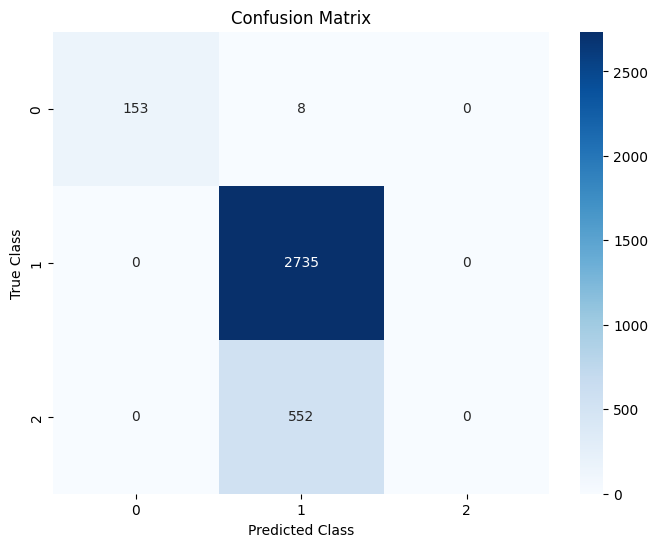

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
len(df)

12330

Identify which type of page has the highest average time spent. So higehst is Product and then admin

In [ ]:
# Correlation matrix
correlation_matrix = df[['Administrative', 'Informational', 'ProductRelated']].corr()
print(correlation_matrix)


                Administrative  Informational  ProductRelated
Administrative        1.000000       0.376850        0.431119
Informational         0.376850       1.000000        0.374164
ProductRelated        0.431119       0.374164        1.000000


<ipython-input-25-b8b7e4f5364c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Session_Category'], palette="coolwarm")


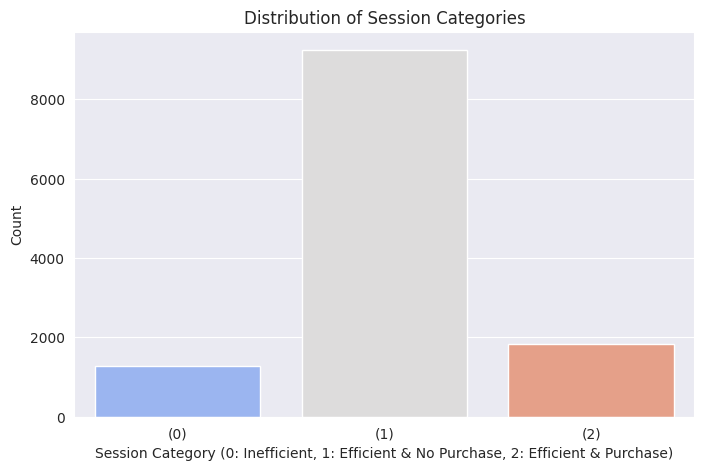

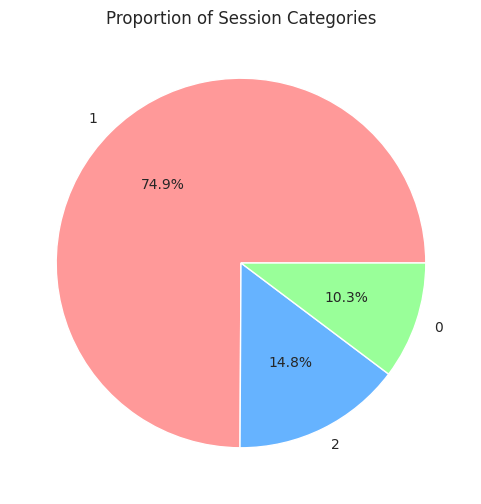

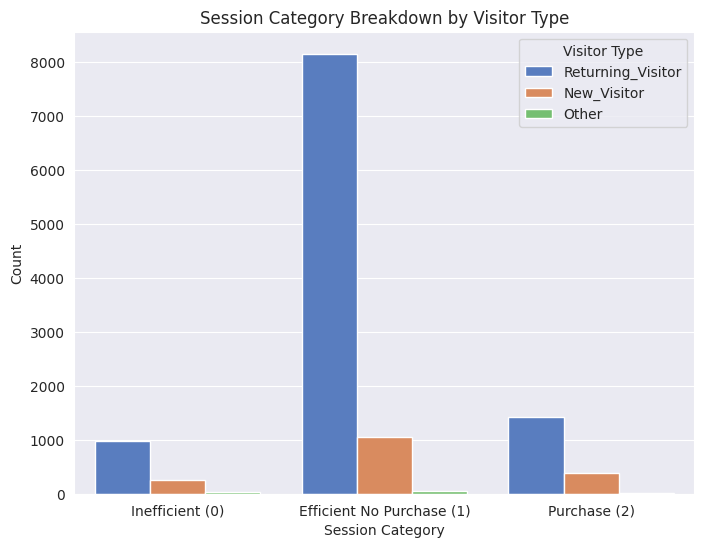

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set the style for better visualization
sns.set_style("darkgrid")

### **1️⃣ Bar Chart - Session Category Count**
plt.figure(figsize=(8,5))
sns.countplot(x=df['Session_Category'], palette="coolwarm")
plt.title("Distribution of Session Categories")
plt.xlabel("Session Category (0: Inefficient, 1: Efficient & No Purchase, 2: Efficient & Purchase)")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=["(0)", "(1)", "(2)"])
plt.show()

### **2️⃣ Pie Chart - Session Category Proportions**
plt.figure(figsize=(6,6))
df['Session_Category'].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Proportion of Session Categories")
plt.ylabel("")  # Hide y-label for clarity
plt.show()

### **3️⃣ Stacked Bar Chart - Session Category by Visitor Type**
plt.figure(figsize=(8,6))
sns.countplot(x=df['Session_Category'], hue=df['VisitorType'], palette="muted")
plt.title("Session Category Breakdown by Visitor Type")
plt.xlabel("Session Category")
plt.ylabel("Count")
plt.legend(title="Visitor Type")
plt.xticks(ticks=[0,1,2], labels=["Inefficient (0)", "Efficient No Purchase (1)", "Purchase (2)"])
plt.show()


